## 1. Importing necessary libraries


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Prepare data

### 2.1. Load data

In [29]:
train_file = "/content/drive/MyDrive/data/TrainingSet.csv"
test_file = "/content/drive/MyDrive/data/TestSet.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)


### 2.2 TF-IDF Vectorization

In [30]:
X_train = df_train['sentence']
y_train = df_train['label']

X_test = df_test['sentence']
y_test = df_test['label']

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


## 3. Model training

### 3.1. Default hyperparameter values

In [31]:
svm_model = LinearSVC(random_state=0) #default C = 1.0
svm_model.fit(X_train_tfidf, y_train)

y_predict_train = svm_model.predict(X_train_tfidf)
y_predict_test = svm_model.predict(X_test_tfidf)

print(f"Train: {accuracy_score(y_train, y_predict_train):.4f}")
print(f"Test: {accuracy_score(y_test, y_predict_test):.4f}")


Train: 0.8734
Test: 0.7787


### 3.2. Hyperparameter tuning

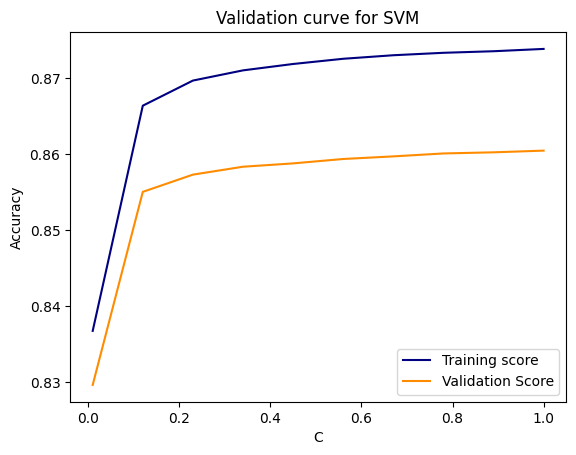

In [32]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

param_range = np.linspace(0.01, 1, 10)

train_scores, test_scores = validation_curve(
    LinearSVC(random_state=0, max_iter = 5000), X_train_tfidf, y_train,
    param_name="C", param_range = param_range, cv=10, scoring="accuracy", n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color = "navy")
plt.plot(param_range, test_mean, label = "Validation Score", color = "darkorange")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.title("Validation curve for SVM")
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3]}

grid_search = GridSearchCV(
    LinearSVC(random_state=0, max_iter=5000), param_grid, cv=10, scoring="accuracy", n_jobs=-1
)
grid_search.fit(X_train_tfidf, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 0.3}


In [34]:
svm_model = LinearSVC(C=0.3, random_state=0)
svm_model.fit(X_train_tfidf, y_train)

y_predict_train = svm_model.predict(X_train_tfidf)
y_predict_test = svm_model.predict(X_test_tfidf)

train_acc = accuracy_score(y_train, y_predict_train)
test_acc = accuracy_score(y_test, y_predict_test)

print(f"Train: {accuracy_score(y_train, y_predict_train):.4f}")
print(f"Test: {accuracy_score(y_test, y_predict_test):.4f}")


Train: 0.8703
Test: 0.7890


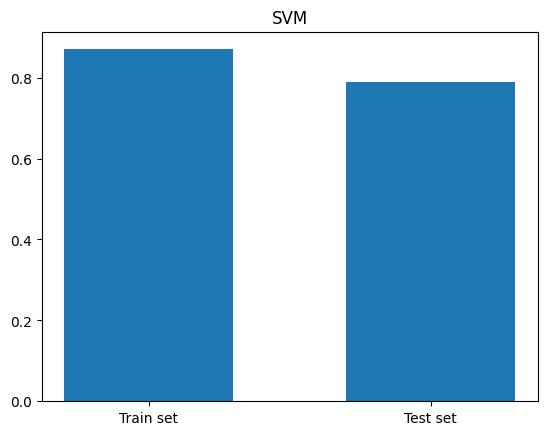

In [35]:
plt.bar(["Train set", "Test set"], [train_acc, test_acc], width=.6)
plt.title("SVM")

plt.show()

### 3.3 Model evaluation

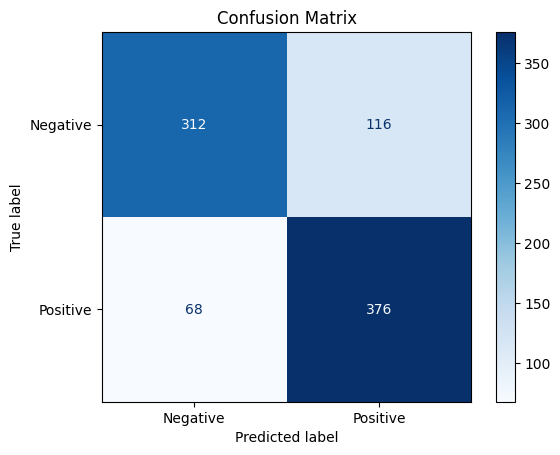

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_predict_test,
    display_labels=["Negative", "Positive"],
    cmap=plt.cm.Blues
)
plt.title("Confusion Matrix")
plt.show()

In [37]:
accuracy = accuracy_score(y_test, y_predict_test)
precision = precision_score(y_test, y_predict_test)
recall = recall_score(y_test, y_predict_test)
f1 = f1_score(y_test, y_predict_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7890
Precision: 0.7642
Recall: 0.8468
F1-score: 0.8034
